# Bricks and Board Code Challenge

## The Problem

I am in an open field with an endless supply of bricks. My hobby is stacking bricks up in equally-spaced columns of random heights.

I choose the number of columns randomly. It could be 10, or 27, or 63,972,152. I'm a patient guy and I like columns of bricks.

Each time, when I'm done, I lay a wooden board on top of the columns of bricks. I have access to a huge variety of board lengths, so I always choose one that starts exactly above the top of the first column, and stretches to exactly above the top of the last column, regardless of its angle.

It doesn't always touch the tops of those columns, of course. I chose the column heights randomly. Maybe on some occasions it rests on those, but in other cases it comes to rest on bricks anywhere in between them. It all depends on the height of the columns and where gravity dictates the board will sit. But in any case, these bricks are rough enough that the board never slides off, even at severe slopes.

Your job is to figure out, given the number of bricks in each column, the slope and y-intercept of my board.

Columns of bricks are provided in an array, where the array index is "x" and the value is "y".

## Forget The High School Line Formula Stuff?

Me too. Here's a quick refresher:

A straight line is defined by the formula y = mx + b:

* **x:** the column number, starting from 0
* **y:** the height of the board, in bricks, at that column
* **m:** the slope of the board, or "rise over run": take two points the board is touching, x1,y1 and x2,y2, and the slope is (y2 - y1) / (x2 - x1).
* **b:** y-intercept: how high the board is from the ground, in bricks, at column 0

> _Important Note:_ For simplicity, let's ignore the fact that any angled board will have a slightly varying height over the width of a stack of bricks. The board's height (y) when it's touching a brick is equal to the number of bricks beneath it.

## Here's an example

`[2, 14, 8, 94, 300, 210, 200, 99, 14, 12]`

Laying a board on top of this, it comes to rest on x=4 y=300, and x=6 y=200. ("Not 300 and 210?!" Some of you are thinking? Nope, if it rested on 210, the slope would be too severe that it would fall BELOW the top of the 200 stack. For real, check the math. This problem isn't as simple as it sounds.)

Slope is rise (y2 - y1) divided by run (x2 - x1). So: (200 - 300) / (6 - 4) = -50.

y-intercept can then be found by plugging the slope into the y=mx+b line equation for either of those resting points above. I'll pick x=6 y=200:

```
200 = -50 * 6 + b
200 = -300 + b
b = 200 - -300
b = 500
```

So with those stacks, slope is **-50** and y-intercept is **500**.

Write me a function that outputs those two variables given any input array. No gravity-defying boards!

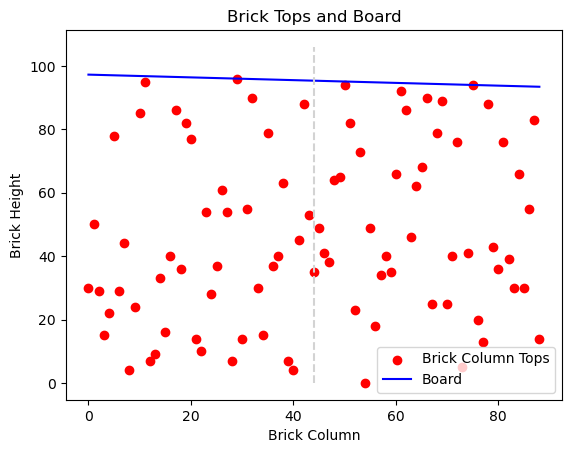

Slope: -0.043478260869565216
Y-Intercept: 97.26086956521739
Array: [30 50 29 15 22 78 29 44  4 24 85 95  7  9 33 16 40 86 36 82 77 14 10 54
 28 37 61 54  7 96 14 55 90 30 15 79 37 40 63  7  4 45 88 53 35 49 41 38
 64 65 94 82 23 73  0 49 18 34 40 35 66 92 86 46 62 68 90 25 79 89 25 40
 76  5 41 94 20 13 88 43 36 76 39 30 66 30 55 83 14]
Midpoint: 44.0


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random

# Function to generate an array of random integers
def generate_random_array(data_length):
    return np.random.randint(0, 100, data_length)

# Function to calculate the slope and y-intercept
def calculate_slope_intercept(arr):
    if len(arr) < 2:
        raise ValueError("Array must have at least two elements")
    
    # the array of points x (columns) to y (bricks)
    arr = np.array(arr)
    # the value of the highest stack of bricks
    maxY = max(arr)
    # array of all the x coordinates that contain the max y value
    maxYKeys = np.where(arr == maxY)[0]
    # the midpoint of the board (center of gravity)
    midpoint = (len(arr)-1)/2
    # the default final slope
    finSlope = 0
    
    if (maxYKeys[0] <= midpoint <= maxYKeys[len(maxYKeys) - 1]) : 
        # if the max y is the midpoint or if there is a matching max y on both sides of the midpoint
        # then the board will be level (slope:0 y-intercept: maxY)
        return finSlope, maxY
    else:
        if (maxYKeys[0] < midpoint):
            # if the lowest x coordinate containing a highest stack is to the left of the midpoint, then 
            # the slope will be negative and we will use the column of bricks that contains a max stack 
            # of bricks and is closest to the midpoint
            x1 = maxYKeys[len(maxYKeys) - 1]
            y1 = arr[x1]
            startIx = x1+1
            endIx = None
        else:
            # if the lowest x coordinate containing a highest stack is to the right of the midpoint, then 
            # the slope will be positive aand we will use the column of bricks that contains a max stack 
            # of bricks and is closest to the midpoint
            x1 = maxYKeys[0]
            y1 = arr[x1]
            startIx = None
            endIx = x1

        while True:
            finSlope, x2 = get_slope_with_x2(x1, y1, arr, startIx, endIx)
            if (maxYKeys[0] < midpoint and x2 <= midpoint) or (maxYKeys[0] > midpoint and x2 >= midpoint):
                # if the final slope was determined by useing a stack on the same side of the center of 
                # gravity as the max stack then we will have a gravity defying board. To keep all 
                # stacks under the board this stack will become the new slope x1,y1 and we will 
                # continue down the slope again
                x1 = x2
                y1 = arr[x2]
                if maxYKeys[0] < midpoint:
                    startIx = x1+1
                else:
                    endIx = x1
            else:
                # nothing else to do, we have the flattest slope allowed while still
                # touching a stack on either side of the center of gravity
                break
        
        y_intercept = y1 - finSlope * x1
        
        return finSlope, y_intercept 

def get_slope_with_x2(x1, y1, arr, startIx, endIx):
    fSlope = 0
    start = startIx or 0
    # loop through the array of values starting from the highest point that is closest
    # to the center of gravity and travel down, analyzing the slope per stack
    for x2, y2 in enumerate(arr[startIx:endIx], start=start):
        slope = (y2 - y1) / (x2 - x1)
        # we want the flattest slope possible ... set the new slope to be based on the stack that gives 
        # us the flattest slope so that we keep all stacks under the board
        if (fSlope == 0 or abs(slope) < abs(fSlope)):
            fSlope = slope
            # track the position of the stack that we are using to determine the final slope
            fx2 = x2
            fy2 = y2
    return fSlope, fx2

# Function to plot the data and the line
def plot_data_with_line(arr, slope, y_intercept):
    x = np.arange(len(arr))
    y = arr
    
    fig, ax = plt.subplots()
    ax.scatter(x, y, color='red', label='Brick Column Tops')
    ax.plot(x, slope * x + y_intercept, color='blue', label='Board')
    
    ax.vlines(x=(len(arr)-1)/2, ymin=0, ymax=max(arr)+10, colors='lightgray', linestyle='--')
    
    plt.xlabel('Brick Column')
    plt.ylabel('Brick Height')
    plt.title('Brick Tops and Board')
    plt.legend()
    plt.show()

# Calling the functions to visualize the output
# data_length = 30
for i in range(1):
    random_number = random.randint(5, 100)
    random_array = generate_random_array(random_number)
    
    slope, y_intercept = calculate_slope_intercept(random_array)
    plot_data_with_line(random_array, slope, y_intercept)
    print("Slope:", slope)
    print("Y-Intercept:", y_intercept)
    print("Array:", random_array)
    print("Midpoint:", (len(random_array)-1)/2)

#input_sizes = range(10, 10000, 500)
# input_sizes = range(100, 5000, 10)
# times = []
# for n in input_sizes:
#     start_time = time.time()
#     random_array = generate_random_array(n)
#     slope, y_intercept = calculate_slope_intercept(random_array)
#     end_time = time.time()
#     times.append(end_time - start_time)

# plt.figure(figsize=(14, 6))
# plt.plot(input_sizes, times)
# plt.xlabel('Input Size')
# plt.ylabel('Time Taken')
# plt.show()

Text(0, 0.5, 'Time Taken')

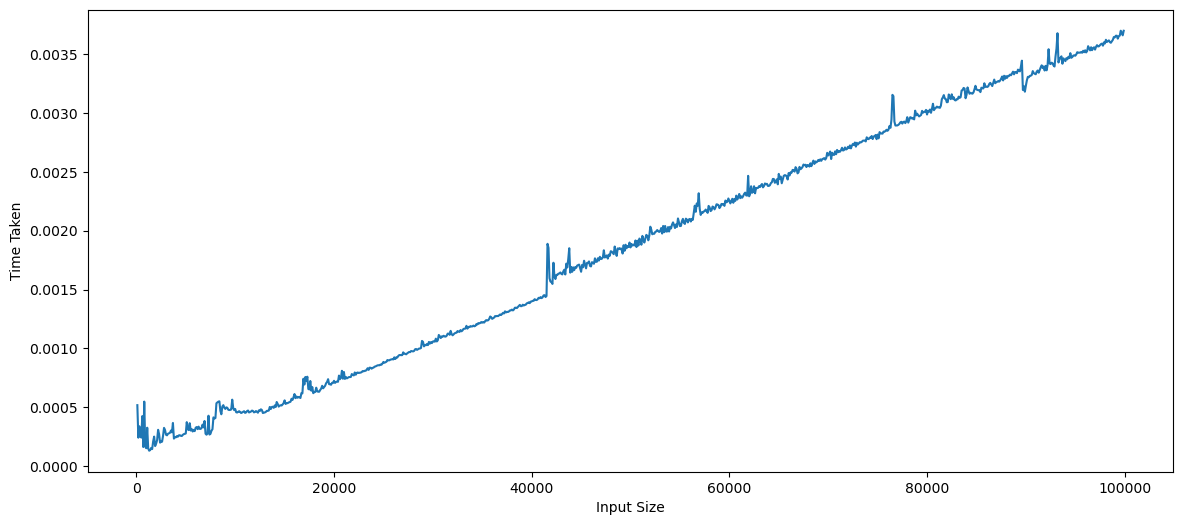

In [3]:
input_sizes = range(100, 100000, 100)
samples = 2
times = []
for n in input_sizes:
    total = 0
    for j in range(samples):
        start_time = time.time()
        random_array = generate_random_array(n)
        slope, y_intercept = calculate_slope_intercept(random_array)
        end_time = time.time()
        total += (end_time - start_time)
    times.append(total / samples)

plt.figure(figsize=(14, 6))
plt.plot(input_sizes, times)
plt.xlabel('Input Size')
plt.ylabel('Time Taken')